**Smartphone Usage Pattern Analysis Project
Data Science 210 Course Project - 2024**

This analysis explores personal smartphone usage patterns using data collected from iPhone's Screen Time feature between October 2024 and November 2024. The project examines daily notification patterns, screen time usage, most frequently used applications, and weekly usage trends. Using Python libraries including pandas for dat\a manipulation, matplotlib for visualization, and numpy for numerical analysis, this study provides insights into digital behavior patterns and screen time management.



Author: Gökşin Değirmenci


Date: January 2024


Import necessary libraries for data analysis and visualization

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read the Data and Small Data Analysis


In [11]:

df = pd.read_excel("Dsa210_propasal_data.xlsx")


print("Dataset Size:", df.shape)
print("\nFirst Five Row:")
print(df.head())

Dataset Size: (60, 9)

First Five Row:
       Tarih  Bildirim Sayısı  Telefonu Açma Sayısı  Ekran Süresi Hedefi (sa)  \
0 2024-11-29              538                    26                       5.9   
1 2024-11-28              540                    23                       5.6   
2 2024-11-27              530                    25                       6.1   
3 2024-11-26              536                    22                       5.8   
4 2024-11-25              533                    20                       5.5   

   Hedef Aşımı (sa) En Yoğun Kullanım Zamanı  Gün İçinde Aktif Saat (sa)  \
0               1.4                    Sabah                         6.9   
1               1.3                    Akşam                         7.0   
2               1.8                    Sabah                         6.8   
3               1.5            Öğleden Sonra                         7.1   
4               1.2                    Sabah                         6.5   

  En Sık Kullanıl

Correlation coefficient: 0.01

Phone Unlock Statistics:
Count: 60.0
Mean: 18.55
Std Dev: 6.71
Min: 5.0
25%: 12.00
50% (Median): 19.50
75%: 23.50
Max: 29.0

Top 3 days with most phone unlocks:
Date: 2024-11-04 00:00:00, Unlocks: 29, Notifications: 449
Date: 2024-10-31 00:00:00, Unlocks: 29, Notifications: 210
Date: 2024-11-06 00:00:00, Unlocks: 28, Notifications: 250

Top 3 days with least phone unlocks:
Date: 2024-10-10 00:00:00, Unlocks: 5, Notifications: 503
Date: 2024-11-10 00:00:00, Unlocks: 8, Notifications: 240
Date: 2024-10-17 00:00:00, Unlocks: 8, Notifications: 582


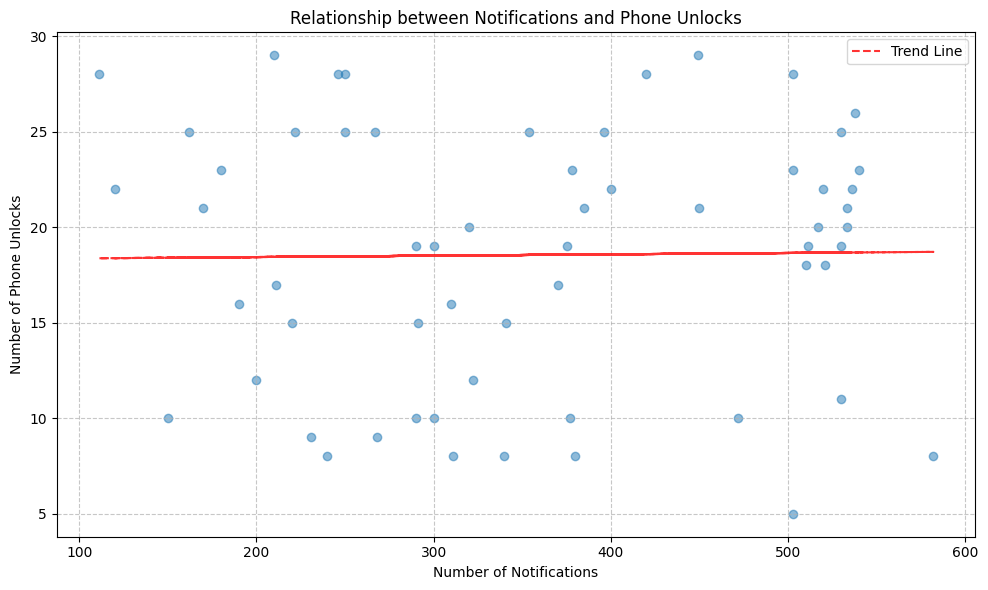

In [16]:
# Correlation analysis using Turkish column names
correlation = df['Bildirim Sayısı'].corr(df['Telefonu Açma Sayısı'])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Bildirim Sayısı'], df['Telefonu Açma Sayısı'], alpha=0.5)
plt.title('Relationship between Notifications and Phone Unlocks')
plt.xlabel('Number of Notifications')
plt.ylabel('Number of Phone Unlocks')

# Add trend line
z = np.polyfit(df['Bildirim Sayısı'], df['Telefonu Açma Sayısı'], 1)
p = np.poly1d(z)
plt.plot(df['Bildirim Sayısı'], p(df['Bildirim Sayısı']), "r--", alpha=0.8, label='Trend Line')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Statistical analysis with English outputs
print(f"Correlation coefficient: {correlation:.2f}")
print("\nPhone Unlock Statistics:")
stats = df['Telefonu Açma Sayısı'].describe()
print(f"""Count: {stats['count']}
Mean: {stats['mean']:.2f}
Std Dev: {stats['std']:.2f}
Min: {stats['min']}
25%: {stats['25%']:.2f}
50% (Median): {stats['50%']:.2f}
75%: {stats['75%']:.2f}
Max: {stats['max']}""")

# Highest and lowest values
print("\nTop 3 days with most phone unlocks:")
top_3 = df.nlargest(3, 'Telefonu Açma Sayısı')[['Tarih', 'Telefonu Açma Sayısı', 'Bildirim Sayısı']]
for _, row in top_3.iterrows():
    print(f"Date: {row['Tarih']}, Unlocks: {row['Telefonu Açma Sayısı']}, Notifications: {row['Bildirim Sayısı']}")

print("\nTop 3 days with least phone unlocks:")
bottom_3 = df.nsmallest(3, 'Telefonu Açma Sayısı')[['Tarih', 'Telefonu Açma Sayısı', 'Bildirim Sayısı']]
for _, row in bottom_3.iterrows():
    print(f"Date: {row['Tarih']}, Unlocks: {row['Telefonu Açma Sayısı']}, Notifications: {row['Bildirim Sayısı']}")

plt.show()

Usage Time Distribution Statistics:
Akşam: 26 days (43.3%)
Sabah: 19 days (31.7%)
Öğleden Sonra: 15 days (25.0%)

Average Screen Time by Period (minutes):
Akşam: 55.46
Sabah: 56.11
Öğleden Sonra: 64.27


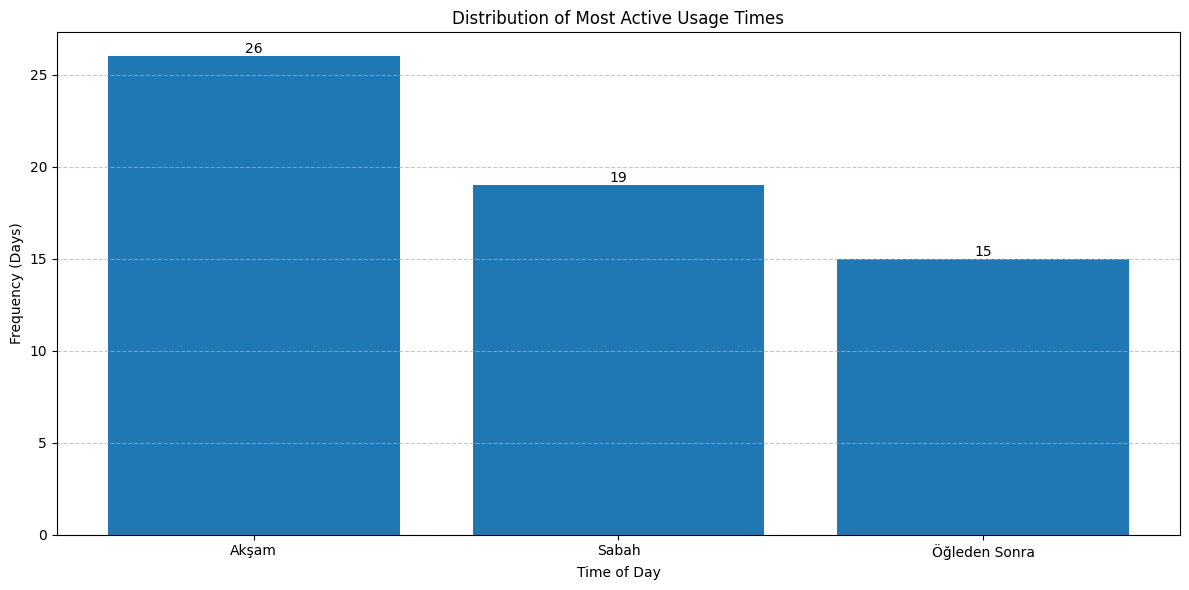

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Count the frequency of each time period
time_distribution = df['En Yoğun Kullanım Zamanı'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(time_distribution.index, time_distribution.values)

# Customize the plot
plt.title('Distribution of Most Active Usage Times')
plt.xlabel('Time of Day')
plt.ylabel('Frequency (Days)')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Print statistics
print("Usage Time Distribution Statistics:")
for time, count in time_distribution.items():
    percentage = (count/len(df)) * 100
    print(f"{time}: {count} days ({percentage:.1f}%)")

# Calculate average screen time for each period
avg_screen_time = df.groupby('En Yoğun Kullanım Zamanı')['Ekran Süresi Kesintisi (dk)'].mean().round(2)
print("\nAverage Screen Time by Period (minutes):")
for period, avg in avg_screen_time.items():
    print(f"{period}: {avg:.2f}")

plt.show()

Application Usage Statistics:

Most Used Applications (days of usage):
WhatsApp: 17 days (28.3%)
Instagram: 15 days (25.0%)
YouTube: 10 days (16.7%)
Spotify: 7 days (11.7%)
TikTok: 5 days (8.3%)
Zoom: 4 days (6.7%)
Tiktok: 1 days (1.7%)
Snapchat: 1 days (1.7%)

Average Screen Time per Application (minutes):
Instagram: 57.3
Snapchat: 45.0
Spotify: 46.3
TikTok: 69.4
Tiktok: 45.0
WhatsApp: 47.8
YouTube: 69.6
Zoom: 85.5


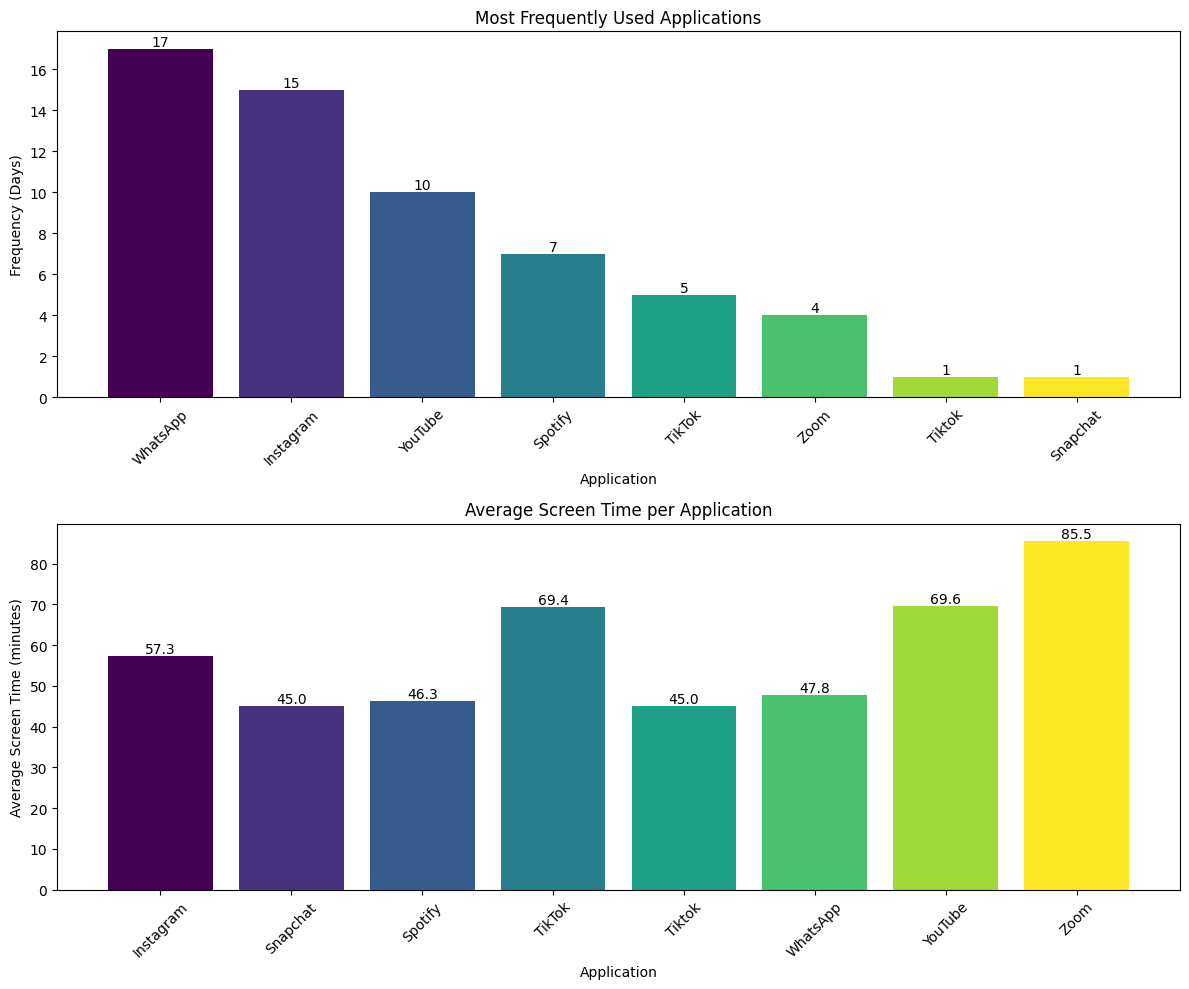

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Count frequency of each application
app_counts = df['En Sık Kullanılan Uygulama'].value_counts()

# Calculate average screen time for each app
app_screen_time = df.groupby('En Sık Kullanılan Uygulama')['Ekran Süresi Kesintisi (dk)'].mean()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Most Used Applications
colors = plt.cm.viridis(np.linspace(0, 1, len(app_counts)))
bars1 = ax1.bar(app_counts.index, app_counts.values, color=colors)
ax1.set_title('Most Frequently Used Applications')
ax1.set_xlabel('Application')
ax1.set_ylabel('Frequency (Days)')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')

# Plot 2: Average Screen Time per Application
bars2 = ax2.bar(app_screen_time.index, app_screen_time.values, color=colors)
ax2.set_title('Average Screen Time per Application')
ax2.set_xlabel('Application')
ax2.set_ylabel('Average Screen Time (minutes)')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom')

plt.tight_layout()

# Print statistics
print("Application Usage Statistics:")
print("\nMost Used Applications (days of usage):")
for app, count in app_counts.items():
    percentage = (count/len(df)) * 100
    print(f"{app}: {count} days ({percentage:.1f}%)")

print("\nAverage Screen Time per Application (minutes):")
for app, time in app_screen_time.items():
    print(f"{app}: {time:.1f}")

plt.show()

Screen Time Goal Analysis:

Average daily target: 6.09 hours
Average daily overflow: 1.35 hours

Days over target: 47 (78.3%)
Days within target: 13 (21.7%)

Top 3 days with highest overflow:
Date: 2024-10-09 00:00:00, Overflow: 6.20 hours
Date: 2024-11-20 00:00:00, Overflow: 5.20 hours
Date: 2024-10-27 00:00:00, Overflow: 4.90 hours


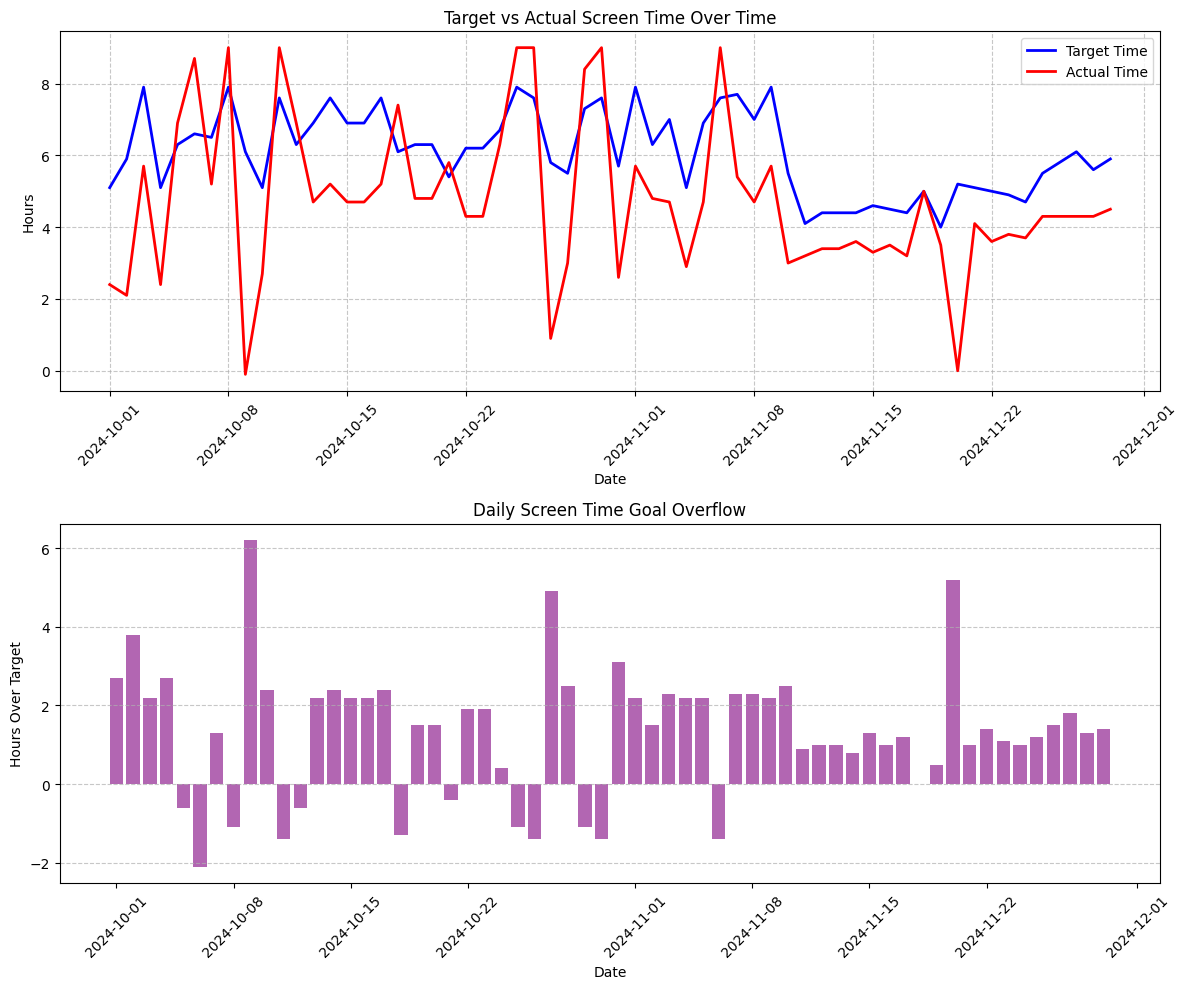

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate goal achievement rate
df['Goal_Achievement'] = (df['Ekran Süresi Hedefi (sa)'] - df['Hedef Aşımı (sa)'])

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Target vs Actual Screen Time
ax1.plot(df['Tarih'], df['Ekran Süresi Hedefi (sa)'], 'b-', label='Target Time', linewidth=2)
ax1.plot(df['Tarih'], df['Goal_Achievement'], 'r-', label='Actual Time', linewidth=2)
ax1.set_title('Target vs Actual Screen Time Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Hours')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Daily Goal Overflow
overflow_data = df['Hedef Aşımı (sa)']
ax2.bar(df['Tarih'], overflow_data, color='purple', alpha=0.6)
ax2.set_title('Daily Screen Time Goal Overflow')
ax2.set_xlabel('Date')
ax2.set_ylabel('Hours Over Target')
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Print statistics
print("Screen Time Goal Analysis:")
print(f"\nAverage daily target: {df['Ekran Süresi Hedefi (sa)'].mean():.2f} hours")
print(f"Average daily overflow: {df['Hedef Aşımı (sa)'].mean():.2f} hours")

# Calculate days over/under target
days_over = (df['Hedef Aşımı (sa)'] > 0).sum()
days_under = (df['Hedef Aşımı (sa)'] <= 0).sum()
print(f"\nDays over target: {days_over} ({(days_over/len(df))*100:.1f}%)")
print(f"Days within target: {days_under} ({(days_under/len(df))*100:.1f}%)")

# Calculate the most significant overflow days
print("\nTop 3 days with highest overflow:")
overflow_days = df.nlargest(3, 'Hedef Aşımı (sa)')
for _, row in overflow_days.iterrows():
    print(f"Date: {row['Tarih']}, Overflow: {row['Hedef Aşımı (sa)']:.2f} hours")

plt.show()

Weekly Usage Pattern Analysis:

Average Daily Statistics:

Monday:
Screen Time: 54.5 minutes
Notifications: 345.0
Unlocks: 16.8
Goal Overflow: 1.26 hours

Tuesday:
Screen Time: 55.8 minutes
Notifications: 314.2
Unlocks: 17.9
Goal Overflow: 1.09 hours

Wednesday:
Screen Time: 61.4 minutes
Notifications: 341.4
Unlocks: 21.2
Goal Overflow: 2.14 hours

Thursday:
Screen Time: 71.0 minutes
Notifications: 372.7
Unlocks: 17.0
Goal Overflow: 1.77 hours

Friday:
Screen Time: 55.2 minutes
Notifications: 410.9
Unlocks: 22.1
Goal Overflow: 0.83 hours

Saturday:
Screen Time: 58.8 minutes
Notifications: 347.6
Unlocks: 18.5
Goal Overflow: 0.59 hours

Sunday:
Screen Time: 46.9 minutes
Notifications: 370.6
Unlocks: 15.9
Goal Overflow: 1.69 hours


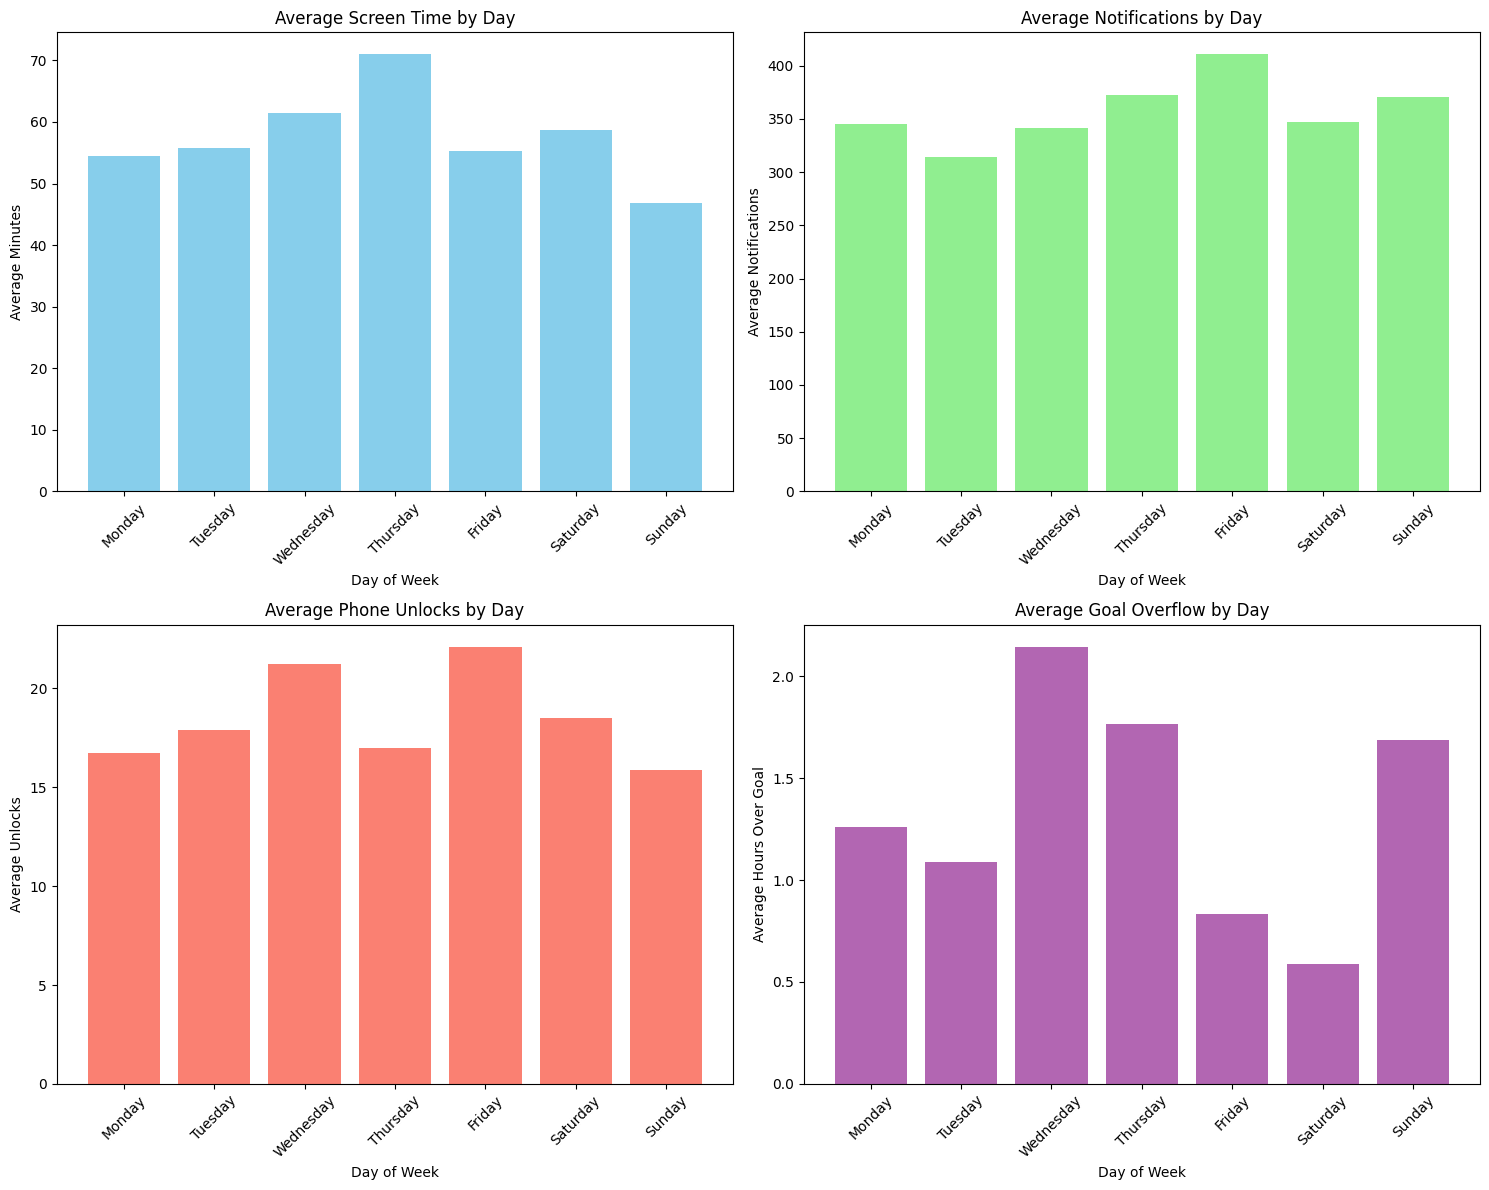

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert dates to days of week
df['Day_of_Week'] = pd.to_datetime(df['Tarih']).dt.day_name()

# Define weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Average Screen Time by Day
daily_screen = df.groupby('Day_of_Week')['Ekran Süresi Kesintisi (dk)'].mean().reindex(day_order)
ax1.bar(daily_screen.index, daily_screen.values, color='skyblue')
ax1.set_title('Average Screen Time by Day')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Average Minutes')
ax1.tick_params(axis='x', rotation=45)

# 2. Average Notifications by Day
daily_notifications = df.groupby('Day_of_Week')['Bildirim Sayısı'].mean().reindex(day_order)
ax2.bar(daily_notifications.index, daily_notifications.values, color='lightgreen')
ax2.set_title('Average Notifications by Day')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Average Notifications')
ax2.tick_params(axis='x', rotation=45)

# 3. Average Phone Unlocks by Day
daily_unlocks = df.groupby('Day_of_Week')['Telefonu Açma Sayısı'].mean().reindex(day_order)
ax3.bar(daily_unlocks.index, daily_unlocks.values, color='salmon')
ax3.set_title('Average Phone Unlocks by Day')
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Average Unlocks')
ax3.tick_params(axis='x', rotation=45)

# 4. Goal Achievement by Day
daily_goals = df.groupby('Day_of_Week')['Hedef Aşımı (sa)'].mean().reindex(day_order)
ax4.bar(daily_goals.index, daily_goals.values, color='purple', alpha=0.6)
ax4.set_title('Average Goal Overflow by Day')
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Average Hours Over Goal')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Print statistics
print("Weekly Usage Pattern Analysis:")
print("\nAverage Daily Statistics:")
for day in day_order:
    day_data = df[df['Day_of_Week'] == day]
    print(f"\n{day}:")
    print(f"Screen Time: {day_data['Ekran Süresi Kesintisi (dk)'].mean():.1f} minutes")
    print(f"Notifications: {day_data['Bildirim Sayısı'].mean():.1f}")
    print(f"Unlocks: {day_data['Telefonu Açma Sayısı'].mean():.1f}")
    print(f"Goal Overflow: {day_data['Hedef Aşımı (sa)'].mean():.2f} hours")

plt.show()

Advanced Usage Analysis:

Usage Pattern Analysis:

App Usage Distribution by Time of Day (%):
En Sık Kullanılan Uygulama  Instagram  Snapchat  Spotify  TikTok  Tiktok  \
En Yoğun Kullanım Zamanı                                                   
Akşam                           30.77      0.00     3.85   11.54    0.00   
Sabah                           21.05      5.26    15.79    5.26    5.26   
Öğleden Sonra                   20.00      0.00    20.00    6.67    0.00   

En Sık Kullanılan Uygulama  WhatsApp  YouTube   Zoom  
En Yoğun Kullanım Zamanı                              
Akşam                          30.77    19.23   3.85  
Sabah                          26.32    10.53  10.53  
Öğleden Sonra                  26.67    20.00   6.67  

Efficiency Metrics:
                            Time Period  Avg Screen Time  Avg Notifications  \
En Yoğun Kullanım Zamanı                                                      
Akşam                             Sabah            55.46             34

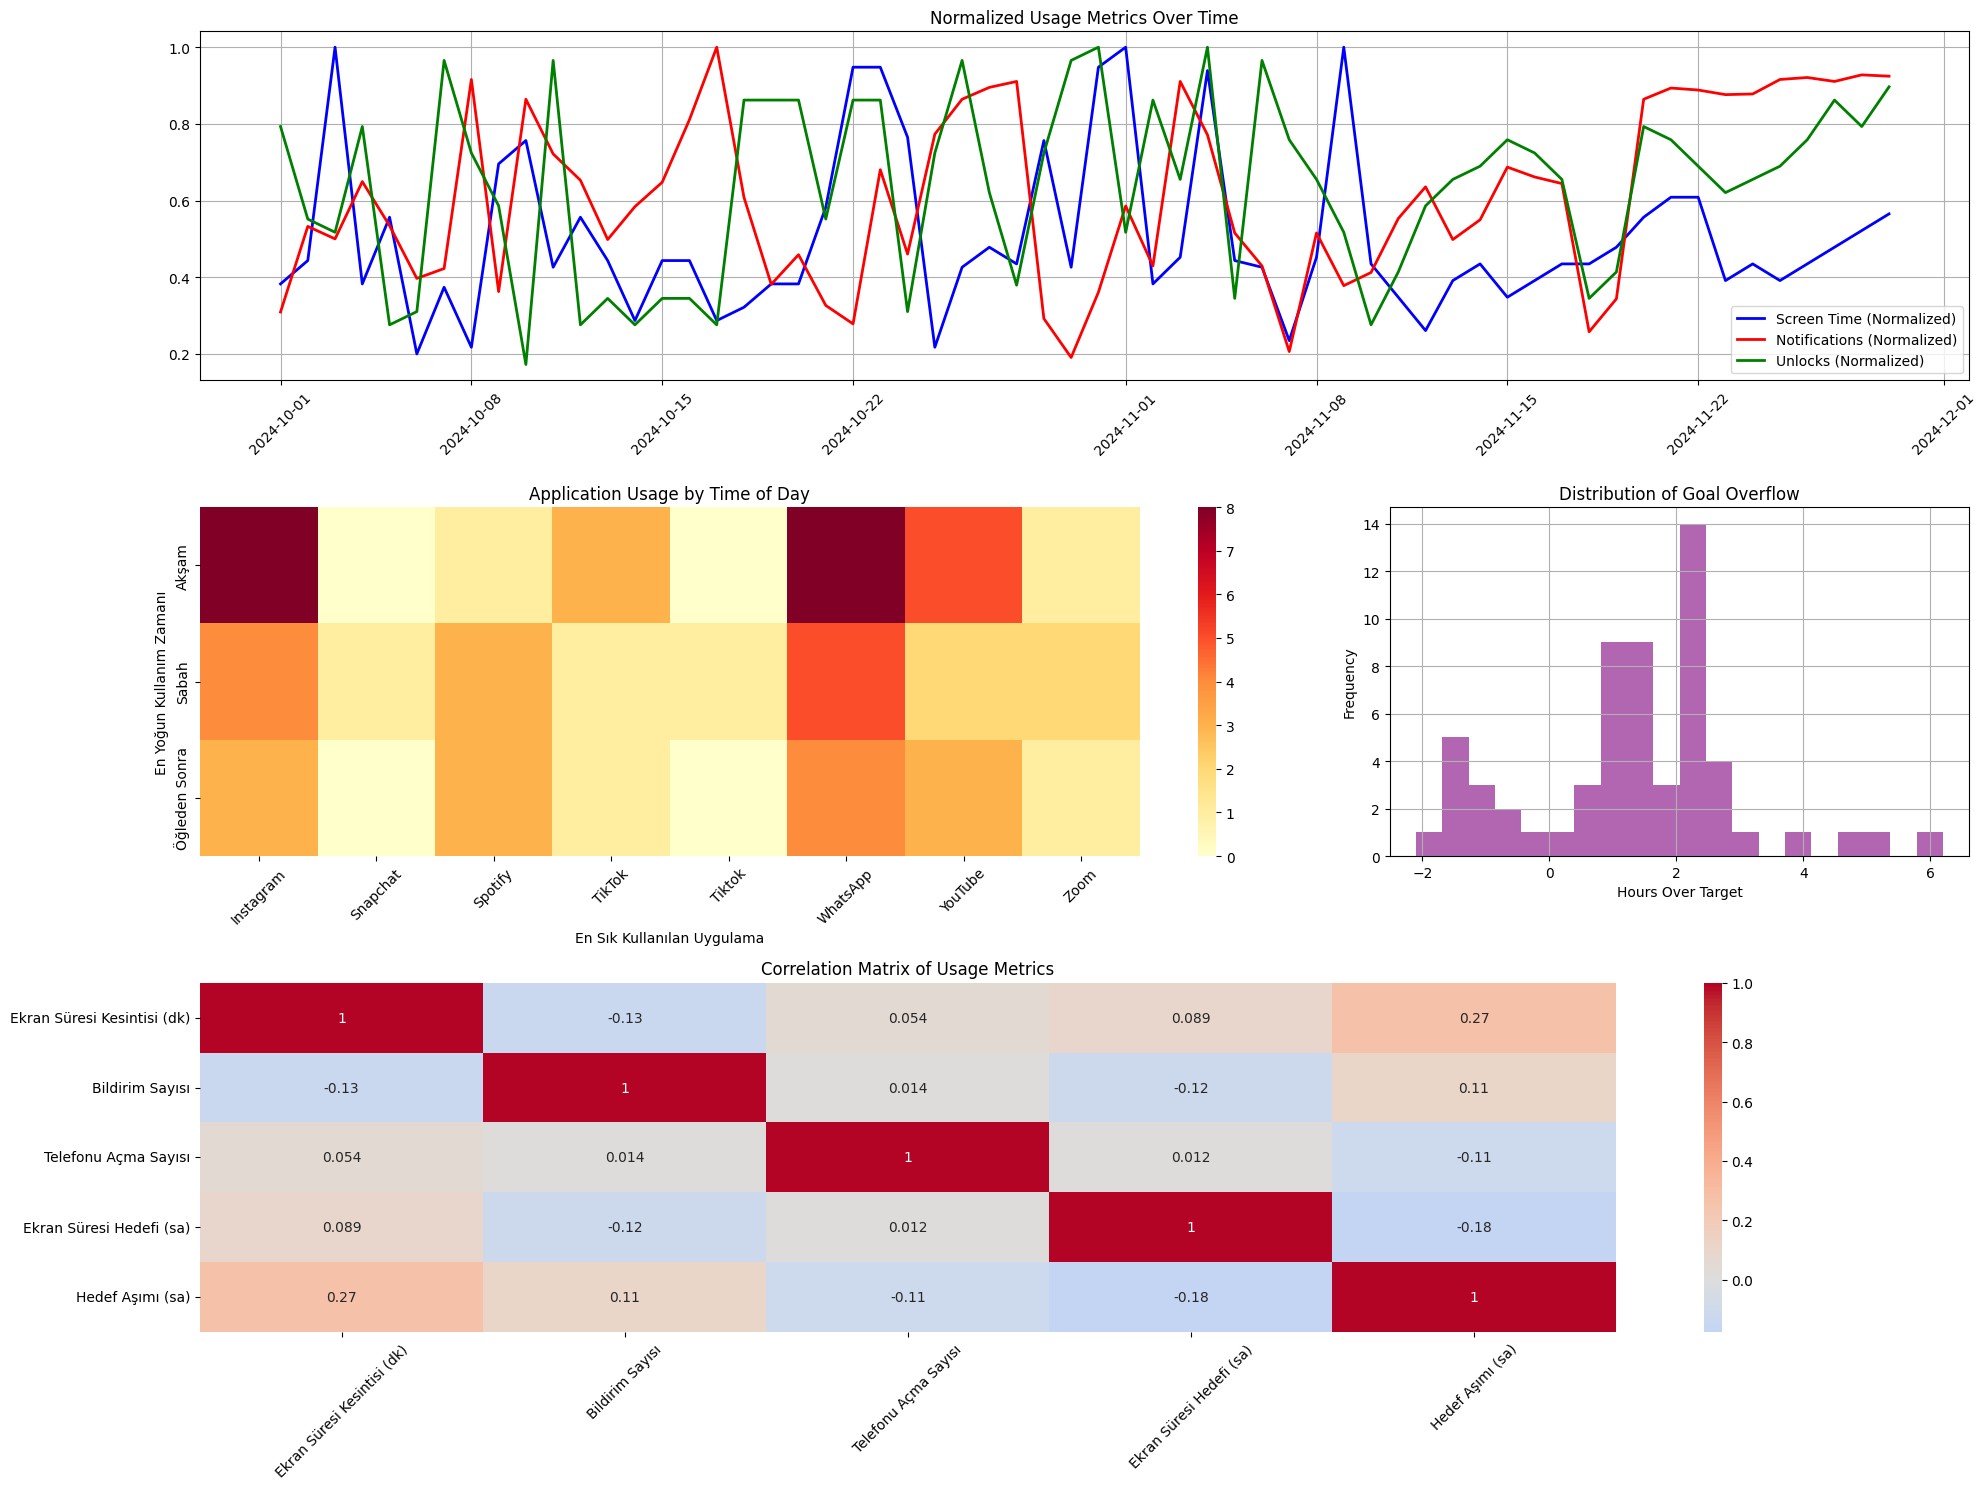

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Create a complex figure layout
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(3, 3, figure=fig)

# 1. Main Usage Metrics Over Time
ax1 = fig.add_subplot(gs[0, :])
scaled_screen_time = df['Ekran Süresi Kesintisi (dk)'] / df['Ekran Süresi Kesintisi (dk)'].max()
scaled_notifications = df['Bildirim Sayısı'] / df['Bildirim Sayısı'].max()
scaled_unlocks = df['Telefonu Açma Sayısı'] / df['Telefonu Açma Sayısı'].max()

ax1.plot(df['Tarih'], scaled_screen_time, 'b-', label='Screen Time (Normalized)', linewidth=2)
ax1.plot(df['Tarih'], scaled_notifications, 'r-', label='Notifications (Normalized)', linewidth=2)
ax1.plot(df['Tarih'], scaled_unlocks, 'g-', label='Unlocks (Normalized)', linewidth=2)
ax1.set_title('Normalized Usage Metrics Over Time')
ax1.legend()
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# 2. Application Usage Heatmap
ax2 = fig.add_subplot(gs[1, 0:2])
app_time_matrix = pd.crosstab(df['En Yoğun Kullanım Zamanı'], df['En Sık Kullanılan Uygulama'])
sns.heatmap(app_time_matrix, cmap='YlOrRd', ax=ax2)
ax2.set_title('Application Usage by Time of Day')
ax2.tick_params(axis='x', rotation=45)

# 3. Goal Achievement Distribution
ax3 = fig.add_subplot(gs[1, 2])
ax3.hist(df['Hedef Aşımı (sa)'], bins=20, color='purple', alpha=0.6)
ax3.set_title('Distribution of Goal Overflow')
ax3.set_xlabel('Hours Over Target')
ax3.set_ylabel('Frequency')
ax3.grid(True)

# 4. Complex Correlation Matrix
metrics = ['Ekran Süresi Kesintisi (dk)', 'Bildirim Sayısı',
          'Telefonu Açma Sayısı', 'Ekran Süresi Hedefi (sa)', 'Hedef Aşımı (sa)']
correlation_matrix = df[metrics].corr()
ax4 = fig.add_subplot(gs[2, :])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4)
ax4.set_title('Correlation Matrix of Usage Metrics')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Print advanced statistics
print("Advanced Usage Analysis:")

# 1. Usage Patterns
print("\nUsage Pattern Analysis:")
time_app_correlation = pd.crosstab(df['En Yoğun Kullanım Zamanı'],
                                 df['En Sık Kullanılan Uygulama'],
                                 normalize='index') * 100
print("\nApp Usage Distribution by Time of Day (%):")
print(time_app_correlation.round(2))

# 2. Efficiency Metrics
print("\nEfficiency Metrics:")
efficiency = pd.DataFrame({
    'Time Period': df['En Yoğun Kullanım Zamanı'].unique(),
    'Avg Screen Time': df.groupby('En Yoğun Kullanım Zamanı')['Ekran Süresi Kesintisi (dk)'].mean(),
    'Avg Notifications': df.groupby('En Yoğun Kullanım Zamanı')['Bildirim Sayısı'].mean(),
    'Goal Achievement Rate': df.groupby('En Yoğun Kullanım Zamanı')['Hedef Aşımı (sa)'].mean()
})
print(efficiency.round(2))

# 3. Usage Intensity Analysis
print("\nUsage Intensity Analysis:")
intensity_score = (df['Ekran Süresi Kesintisi (dk)'] * 0.4 +
                  df['Bildirim Sayısı'] * 0.3 +
                  df['Telefonu Açma Sayısı'] * 0.3)
print(f"Average Usage Intensity Score: {intensity_score.mean():.2f}")
print(f"Peak Usage Intensity Score: {intensity_score.max():.2f}")
print(f"Date of Peak Usage: {df.iloc[intensity_score.argmax()]['Tarih']}")

plt.show()

Screen Time Prediction Analysis:

Model Performance:
R-squared Score: -0.121

Predictive Patterns:
Expected Screen Time by Day of Week:
Day 0: Actual = 54.5 min, Predicted = 57.5 min
Day 1: Actual = 55.8 min, Predicted = 58.4 min
Day 2: Actual = 61.4 min, Predicted = 58.5 min
Day 3: Actual = 71.0 min, Predicted = 55.1 min
Day 4: Actual = 55.2 min, Predicted = 55.7 min
Day 5: Actual = 58.8 min, Predicted = 55.4 min
Day 6: Actual = 46.9 min, Predicted = 53.0 min

Prediction Accuracy Metrics:
Mean Absolute Error: 17.85 minutes
Standard Deviation of Error: 23.84 minutes

Next Day Prediction: 64.0 minutes


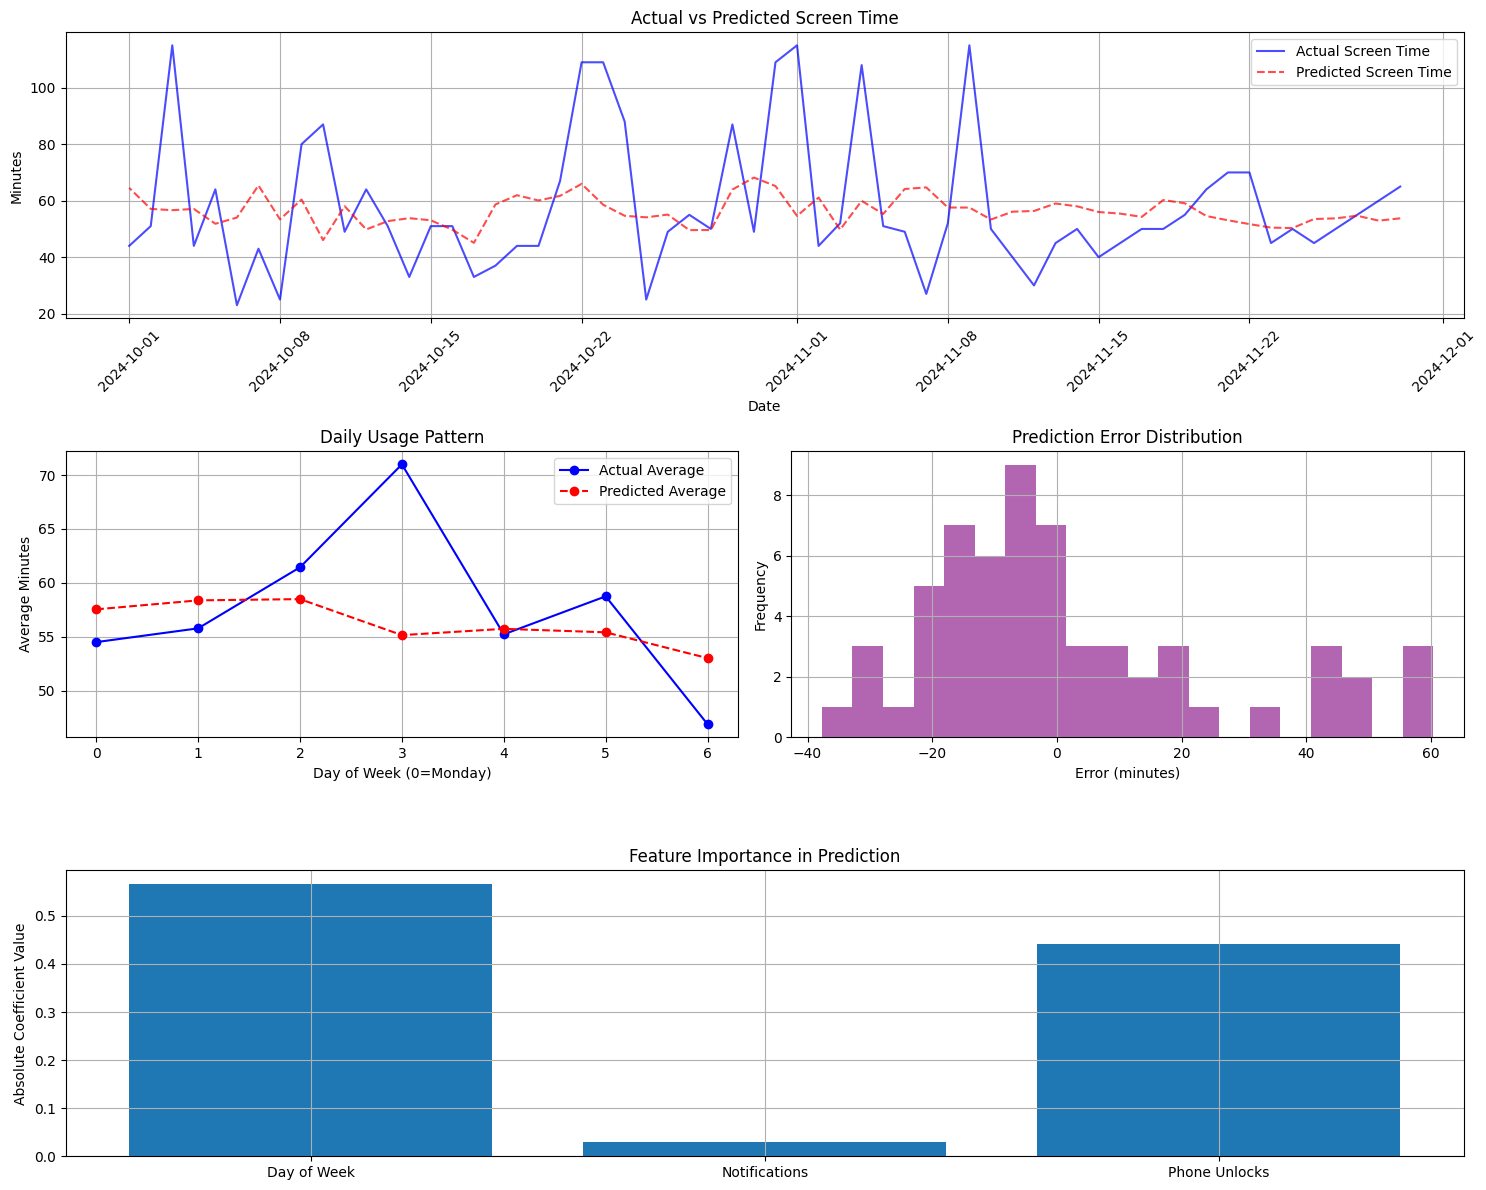

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats

# Prepare time-based features
df['Day_Num'] = pd.to_datetime(df['Tarih']).dt.dayofweek
df['Week_Num'] = pd.to_datetime(df['Tarih']).dt.isocalendar().week

# Create prediction features
X = df[['Day_Num', 'Bildirim Sayısı', 'Telefonu Açma Sayısı']]
y = df['Ekran Süresi Kesintisi (dk)']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
df['Predicted_Screen_Time'] = model.predict(X)

# Create visualization
fig = plt.figure(figsize=(15, 12))
gs = plt.GridSpec(3, 2)

# 1. Actual vs Predicted Screen Time
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df['Tarih'], df['Ekran Süresi Kesintisi (dk)'], 'b-', label='Actual Screen Time', alpha=0.7)
ax1.plot(df['Tarih'], df['Predicted_Screen_Time'], 'r--', label='Predicted Screen Time', alpha=0.7)
ax1.set_title('Actual vs Predicted Screen Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Minutes')
ax1.legend()
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# 2. Daily Pattern Prediction
ax2 = fig.add_subplot(gs[1, 0])
daily_pattern = df.groupby('Day_Num')['Ekran Süresi Kesintisi (dk)'].mean()
daily_pred = df.groupby('Day_Num')['Predicted_Screen_Time'].mean()
ax2.plot(daily_pattern.index, daily_pattern.values, 'bo-', label='Actual Average')
ax2.plot(daily_pred.index, daily_pred.values, 'ro--', label='Predicted Average')
ax2.set_title('Daily Usage Pattern')
ax2.set_xlabel('Day of Week (0=Monday)')
ax2.set_ylabel('Average Minutes')
ax2.legend()
ax2.grid(True)

# 3. Prediction Error Distribution
ax3 = fig.add_subplot(gs[1, 1])
prediction_error = df['Ekran Süresi Kesintisi (dk)'] - df['Predicted_Screen_Time']
ax3.hist(prediction_error, bins=20, color='purple', alpha=0.6)
ax3.set_title('Prediction Error Distribution')
ax3.set_xlabel('Error (minutes)')
ax3.set_ylabel('Frequency')
ax3.grid(True)

# 4. Feature Importance Plot
ax4 = fig.add_subplot(gs[2, :])
feature_importance = pd.DataFrame({
    'Feature': ['Day of Week', 'Notifications', 'Phone Unlocks'],
    'Importance': np.abs(model.coef_)
})
ax4.bar(feature_importance['Feature'], feature_importance['Importance'])
ax4.set_title('Feature Importance in Prediction')
ax4.set_ylabel('Absolute Coefficient Value')
ax4.grid(True)

plt.tight_layout()

# Print prediction analysis
print("Screen Time Prediction Analysis:")
print("\nModel Performance:")
print(f"R-squared Score: {model.score(X_test, y_test):.3f}")

print("\nPredictive Patterns:")
print("Expected Screen Time by Day of Week:")
for day, (actual, pred) in enumerate(zip(daily_pattern, daily_pred)):
    print(f"Day {day}: Actual = {actual:.1f} min, Predicted = {pred:.1f} min")

print("\nPrediction Accuracy Metrics:")
print(f"Mean Absolute Error: {np.abs(prediction_error).mean():.2f} minutes")
print(f"Standard Deviation of Error: {prediction_error.std():.2f} minutes")

# Calculate and print future usage prediction
next_day_features = X.iloc[-1:].copy()
next_day_features['Day_Num'] = (next_day_features['Day_Num'] + 1) % 7
next_day_prediction = model.predict(next_day_features)[0]
print(f"\nNext Day Prediction: {next_day_prediction:.1f} minutes")

plt.show()

Weekend vs Weekday Comparison:

Screen Time:

Weekday Statistics:
Average Screen Time: 59.7 minutes
Average Notifications: 357.1
Average Phone Unlocks: 19.0
Average Goal Overflow: 1.42 hours

Top 3 Apps (Weekday):
Instagram: 13 days
WhatsApp: 11 days
YouTube: 7 days

Weekend Statistics:
Average Screen Time: 52.8 minutes
Average Notifications: 359.1
Average Phone Unlocks: 17.2
Average Goal Overflow: 1.14 hours

Top 3 Apps (Weekend):
WhatsApp: 6 days
YouTube: 3 days
Spotify: 3 days


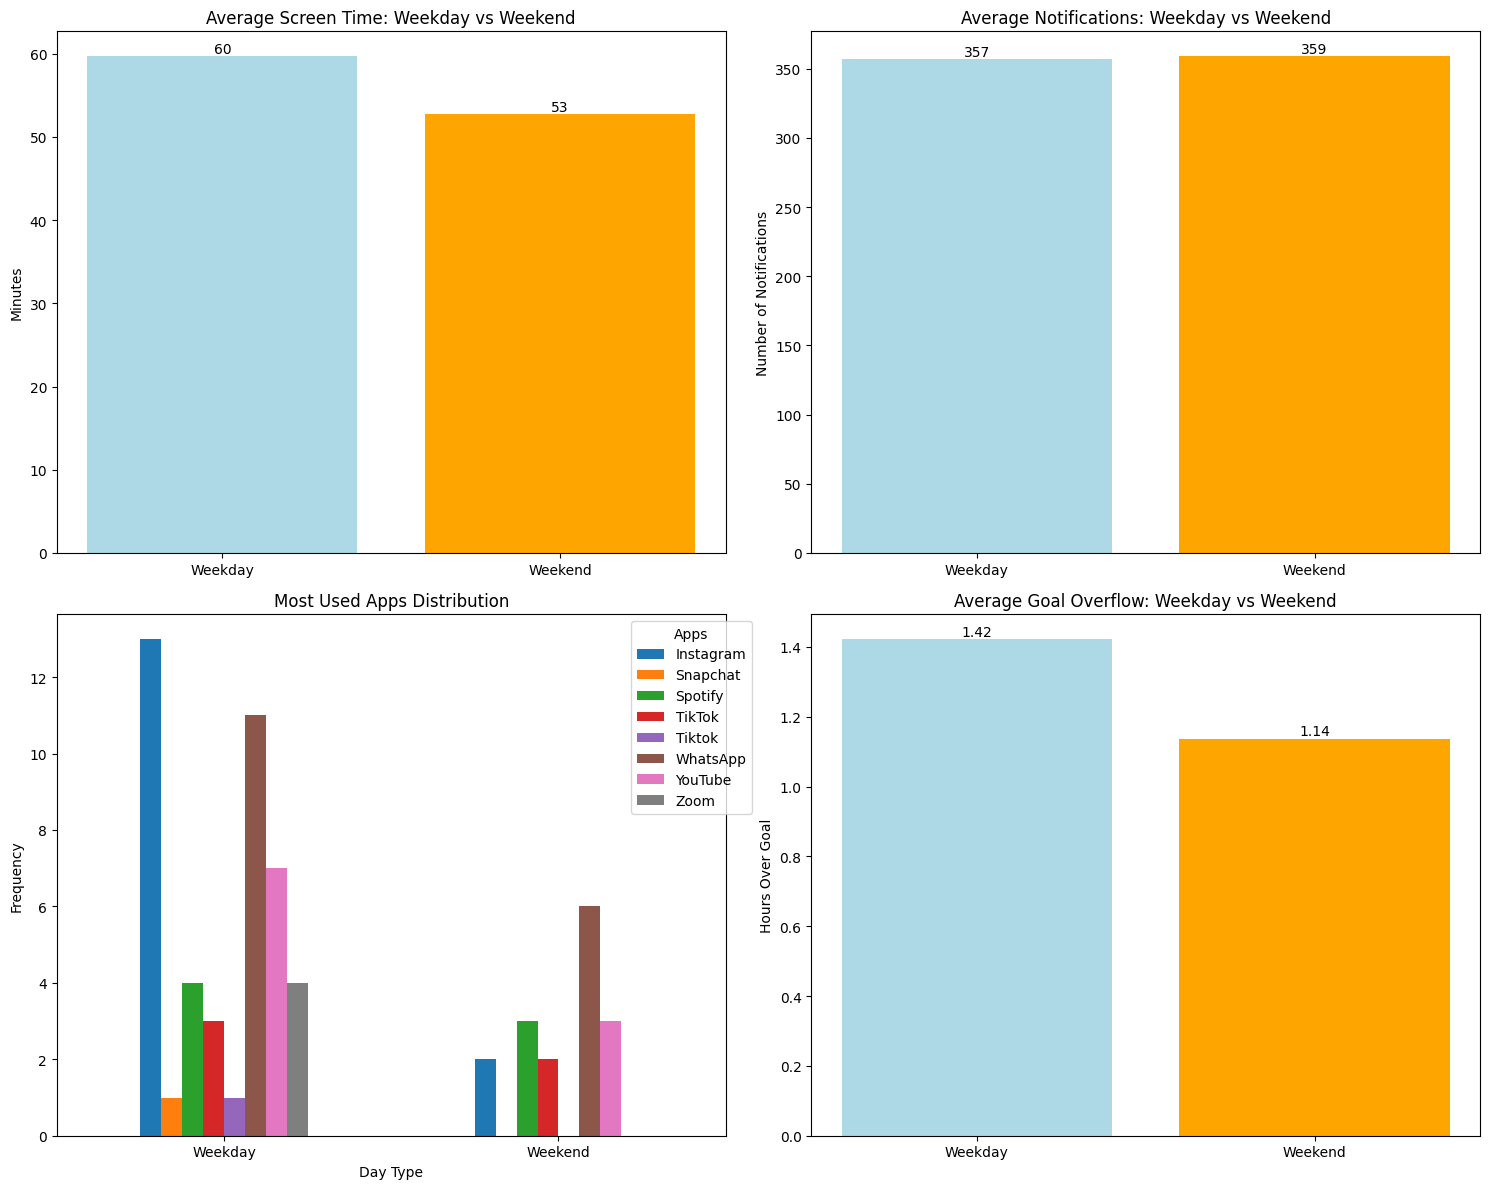

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create weekend/weekday classification
df['Date'] = pd.to_datetime(df['Tarih'])
df['Is_Weekend'] = df['Date'].dt.dayofweek.isin([5, 6])  # 5=Saturday, 6=Sunday
df['Day_Type'] = df['Is_Weekend'].map({True: 'Weekend', False: 'Weekday'})

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Screen Time Comparison
screen_time_comp = df.groupby('Day_Type')['Ekran Süresi Kesintisi (dk)'].mean()
bars1 = ax1.bar(screen_time_comp.index, screen_time_comp.values, color=['lightblue', 'orange'])
ax1.set_title('Average Screen Time: Weekday vs Weekend')
ax1.set_ylabel('Minutes')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.0f}',
             ha='center', va='bottom')

# 2. Notifications Comparison
notif_comp = df.groupby('Day_Type')['Bildirim Sayısı'].mean()
bars2 = ax2.bar(notif_comp.index, notif_comp.values, color=['lightblue', 'orange'])
ax2.set_title('Average Notifications: Weekday vs Weekend')
ax2.set_ylabel('Number of Notifications')

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.0f}',
             ha='center', va='bottom')

# 3. Most Used Apps Distribution
app_usage = df.groupby(['Day_Type', 'En Sık Kullanılan Uygulama']).size().unstack()
app_usage.plot(kind='bar', ax=ax3)
ax3.set_title('Most Used Apps Distribution')
ax3.set_xlabel('Day Type')
ax3.set_ylabel('Frequency')
ax3.legend(title='Apps', bbox_to_anchor=(1.05, 1))
ax3.tick_params(axis='x', rotation=0)

# 4. Goal Achievement Comparison
goal_comp = df.groupby('Day_Type')['Hedef Aşımı (sa)'].mean()
bars4 = ax4.bar(goal_comp.index, goal_comp.values, color=['lightblue', 'orange'])
ax4.set_title('Average Goal Overflow: Weekday vs Weekend')
ax4.set_ylabel('Hours Over Goal')

# Add value labels
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()

# Print detailed statistics
print("Weekend vs Weekday Comparison:")

print("\nScreen Time:")
for day_type in ['Weekday', 'Weekend']:
    data = df[df['Day_Type'] == day_type]
    print(f"\n{day_type} Statistics:")
    print(f"Average Screen Time: {data['Ekran Süresi Kesintisi (dk)'].mean():.1f} minutes")
    print(f"Average Notifications: {data['Bildirim Sayısı'].mean():.1f}")
    print(f"Average Phone Unlocks: {data['Telefonu Açma Sayısı'].mean():.1f}")
    print(f"Average Goal Overflow: {data['Hedef Aşımı (sa)'].mean():.2f} hours")

    # Most used apps
    top_apps = data['En Sık Kullanılan Uygulama'].value_counts().head(3)
    print(f"\nTop 3 Apps ({day_type}):")
    for app, count in top_apps.items():
        print(f"{app}: {count} days")

plt.show()